In [27]:
import tensorflow as tf
from tensorflow import keras
from random import shuffle
import numpy as np
import csv

In [28]:
dict = {
    0: "Rock",
    1: "Paper",
    2: "Scissors"
}

In [29]:
player_sequences = []
computer_sequences = []
win_data = []

labels = []

maxlen = 3
split = 0.7

with open('../../data/temp.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)

    next(reader)

    for row in reader:
        inputs = [int(char) for char in row[2]]
        for i in range(1, len(inputs)+1):
            player_sequences.append(inputs[:i+1])
        inputs = [int(char) for char in row[4]]
        for i in range(1, len(inputs)+1):
            computer_sequences.append(inputs[:i+1])
        inputs = [(lambda x : 1 if x=='w' else (0 if x=='t' else -1))(char) for char in row[3]]
        for i in range(1, len(inputs)+1):
            win_data.append(inputs[:i+1])

# s = '2002120021200212002120021200212002120021200212002120021200212002120021200212002120021200212002120021'
# input = [int(i) for i in s]
# for i in range(1, len(input)+1):
#     player_sequences.append(input[:i+1])


In [30]:
np.shape(player_sequences), np.shape(computer_sequences), np.shape(win_data)

C:\Users\mahaj\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


((494,), (494,), (494,))

In [31]:
player_sequences = list(filter(lambda x : len(x) >= maxlen+1,player_sequences))
computer_sequences = list(filter(lambda x : len(x) >= maxlen+1, computer_sequences))
win_data = list(filter(lambda x : len(x) >= maxlen+1, win_data))

In [32]:
player_sequences = list(map(lambda x: x[-maxlen-1:], player_sequences))
computer_sequences = list(map(lambda x: x[-maxlen-1:], computer_sequences))
win_data = list(map(lambda x: x[-maxlen-1:], win_data))

In [33]:
player_sequences[:5], computer_sequences[:5], win_data[:5]

([[1, 2, 1, 1], [2, 1, 1, 1], [1, 1, 1, 2], [1, 1, 2, 3], [1, 2, 3, 2]],
 [[3, 1, 3, 1], [1, 3, 1, 2], [3, 1, 2, 2], [1, 2, 2, 1], [2, 2, 1, 3]],
 [[1, 1, 1, 0], [1, 1, 0, -1], [1, 0, -1, 0], [0, -1, 0, -1], [-1, 0, -1, -1]])

In [34]:
player_sequences, computer_sequences, win_data = np.array(player_sequences), np.array(computer_sequences), np.array(win_data)

In [35]:
player_inputs, labels = player_sequences[:,:-1], player_sequences[:,-1]
computer_inputs = computer_sequences[:,:-1]
win_inputs = win_data[:,:-1]

In [36]:
np.shape(player_inputs), np.shape(computer_inputs), np.shape(win_inputs)

((492, 3), (492, 3), (492, 3))

In [37]:
player_inputs[:5], computer_inputs[:5], win_inputs[:5]

(array([[1, 2, 1],
        [2, 1, 1],
        [1, 1, 1],
        [1, 1, 2],
        [1, 2, 3]]),
 array([[3, 1, 3],
        [1, 3, 1],
        [3, 1, 2],
        [1, 2, 2],
        [2, 2, 1]]),
 array([[ 1,  1,  1],
        [ 1,  1,  0],
        [ 1,  0, -1],
        [ 0, -1,  0],
        [-1,  0, -1]]))

In [38]:
inputs = np.stack((player_inputs, win_inputs), axis=1)
input_dim = 2

In [39]:
# inputs = inputs-1
labels = labels-1

# inputs = inputs /2 
# inputs

In [40]:
inputs[:5], labels[:5]

(array([[[ 1,  2,  1],
         [ 1,  1,  1]],
 
        [[ 2,  1,  1],
         [ 1,  1,  0]],
 
        [[ 1,  1,  1],
         [ 1,  0, -1]],
 
        [[ 1,  1,  2],
         [ 0, -1,  0]],
 
        [[ 1,  2,  3],
         [-1,  0, -1]]]),
 array([0, 0, 1, 2, 1]))

In [41]:
# np.shape(player_sequences), labels

In [42]:
train_size = int(split * len(inputs))
valid_size = int(((1+split)/2) * len(inputs))

training_data, training_labels = inputs[:train_size], labels[:train_size]
valid_data, valid_labels = inputs[train_size:valid_size], labels[train_size:valid_size]
test_data, test_labels = inputs[valid_size:], labels[valid_size:]

In [43]:
print(f"Training data: {training_data.shape}, {training_labels.shape}")
print(f"Validation data: {valid_data.shape}, {valid_labels.shape}")
print(f"Test data: {test_data.shape}, {test_labels.shape}")

Training data: (344, 2, 3), (344,)
Validation data: (74, 2, 3), (74,)
Test data: (74, 2, 3), (74,)


In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(160, input_shape=(input_dim, maxlen), return_sequences=True),
    tf.keras.layers.LSTM(160, return_sequences=True),
    tf.keras.layers.LSTM(160),
    
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [45]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [46]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(training_data, training_labels, epochs=250, batch_size=16, verbose=1, shuffle=True, validation_data=(valid_data, valid_labels))

Epoch 1/250
22/22 [==============================] - 10s 86ms/step - loss: 1.0995 - accuracy: 0.3227 - val_loss: 1.0980 - val_accuracy: 0.3514
Epoch 2/250
22/22 [==============================] - 0s 13ms/step - loss: 1.0999 - accuracy: 0.3110 - val_loss: 1.0983 - val_accuracy: 0.3243
Epoch 3/250
22/22 [==============================] - 0s 14ms/step - loss: 1.0992 - accuracy: 0.3401 - val_loss: 1.0978 - val_accuracy: 0.3514
Epoch 4/250
22/22 [==============================] - 0s 19ms/step - loss: 1.0994 - accuracy: 0.3459 - val_loss: 1.0978 - val_accuracy: 0.3514
Epoch 5/250
22/22 [==============================] - 0s 16ms/step - loss: 1.0993 - accuracy: 0.3459 - val_loss: 1.0980 - val_accuracy: 0.3514
Epoch 6/250
22/22 [==============================] - 0s 16ms/step - loss: 1.1000 - accuracy: 0.2965 - val_loss: 1.0981 - val_accuracy: 0.3514
Epoch 7/250
22/22 [==============================] - 0s 14ms/step - loss: 1.0989 - accuracy: 0.2994 - val_loss: 1.0983 - val_accuracy: 0.3514
Epoch

KeyboardInterrupt: 

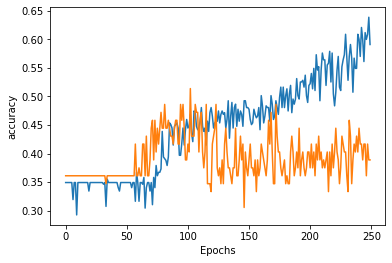

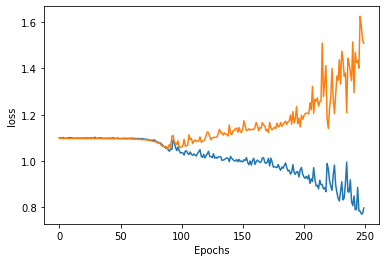

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.evaluate(test_data, test_labels)

3/3 [==============================] - 0s 13ms/step - loss: 1.2909 - accuracy: 0.3472


[1.2908666133880615, 0.3472222089767456]

In [ ]:
model.save('../models/test_lstm.h5')